# CUREYA TASK 5

STOCK PRICE PREDICTION

In [24]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime

In [53]:
#Importing dataset
df = pd.read_csv('HistoricalQuotes.csv',index_col='Date', parse_dates=True)

In [54]:
#determines rows & columns
df.shape

(2518, 5)

In [55]:
#prints first 5 rows
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
2020-02-27,$273.52,80151380,$281.1,$286,$272.96
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23


In [56]:
#prints last 5 rows
df.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2010-03-05,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2010-03-04,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2010-03-03,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2010-03-02,$29.8357,141486282,$29.99,$30.1186,$29.6771
2010-03-01,$29.8557,137312041,$29.3928,$29.9286,$29.35


In [57]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2020-02-28 to 2010-03-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Close/Last  2518 non-null   object
 1    Volume      2518 non-null   int64 
 2    Open        2518 non-null   object
 3    High        2518 non-null   object
 4    Low         2518 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In [58]:
#describes the whole dataset
df.describe()

,Volume
count,2.518000e+03
mean,7.258009e+07
std,5.663113e+07
min,1.136205e+07
25%,3.053026e+07
50%,5.295469e+07
75%,9.861006e+07
max,4.624423e+08


In [59]:
#Checking the null values in dataset
df.isnull().sum()

 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64

In [60]:
#making all values of float data type
df = df.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
df['Close'] = df['Close'].str.replace('$', '').astype('float')
df['Open'] = df['Open'].str.replace('$', '').astype('float')
df['High'] = df['High'].str.replace('$', '').astype('float')
df['Low'] = df['Low'].str.replace('$', '').astype('float')
df.head()

<ipython-input-60-fd222c5c9f2e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Close'] = df['Close'].str.replace('$', '').astype('float')
<ipython-input-60-fd222c5c9f2e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Open'] = df['Open'].str.replace('$', '').astype('float')
<ipython-input-60-fd222c5c9f2e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['High'] = df['High'].str.replace('$', '').astype('float')
<ipython-input-60-fd222c5c9f2e>:6: FutureWarning: The default value of regex will change from True to

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.36,106721200,257.26,278.41,256.37
2020-02-27,273.52,80151380,281.10,286.00,272.96
2020-02-26,292.65,49678430,286.53,297.88,286.50
2020-02-25,288.08,57668360,300.95,302.53,286.13
2020-02-24,298.18,55548830,297.26,304.18,289.23


# Data Visualization

EXPLORATORY DATA ANALYSIS

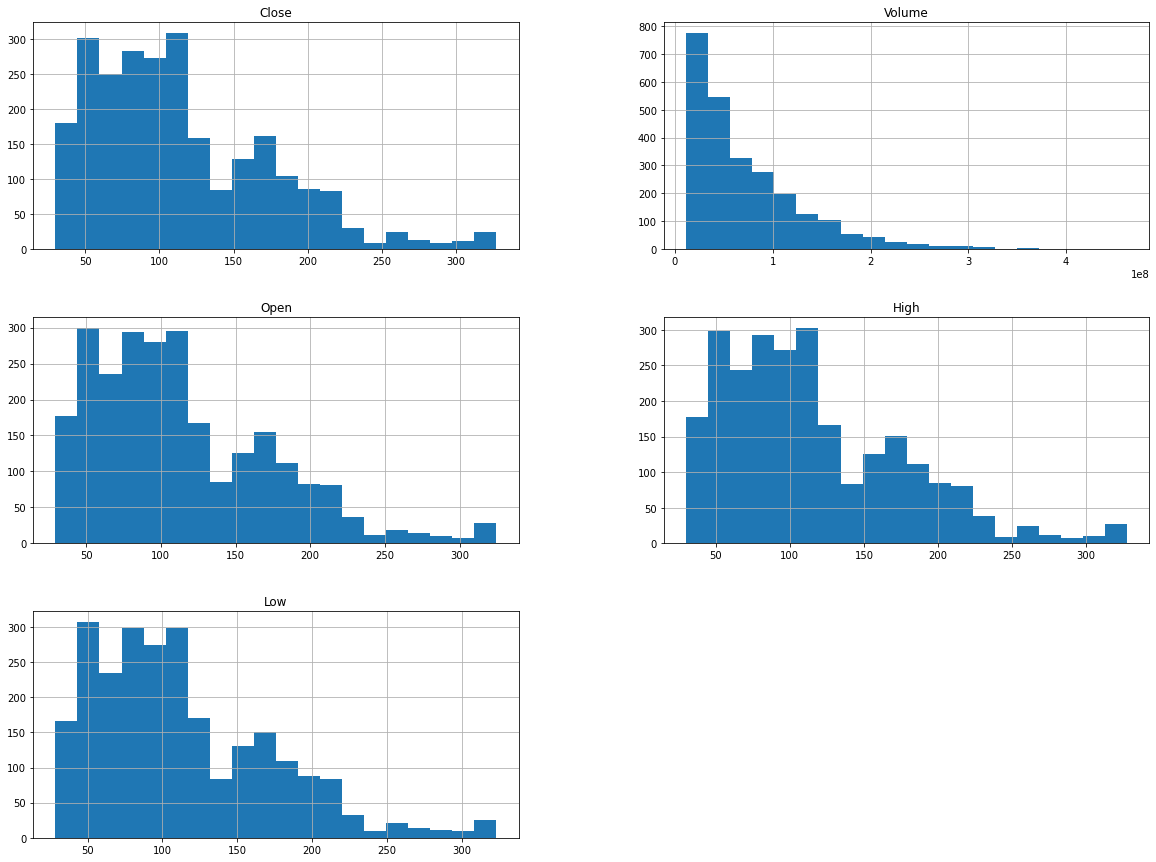

In [33]:
#Data distribution of all the numeric variables
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
plt.show()

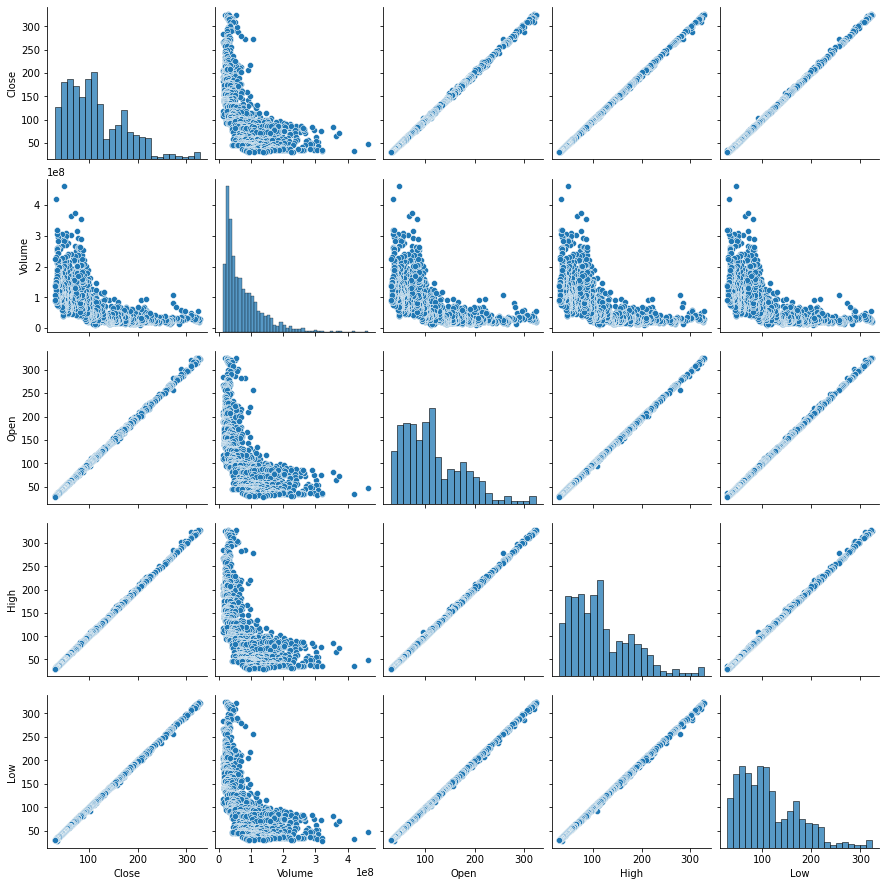

In [34]:
sns.pairplot(df)

<AxesSubplot:xlabel='Date'>

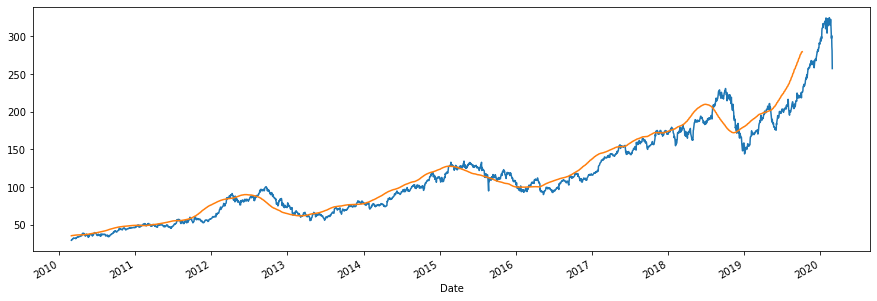

In [35]:
df['Open'].plot(figsize=(15, 5))
df.rolling(100).mean()['Open'].plot()

In [36]:
df.corr()

,Close,Volume,Open,High,Low
Close,1.000000,-0.608502,0.999653,0.999828,0.999842
Volume,-0.608502,1.000000,-0.607704,-0.605073,-0.611775
Open,0.999653,-0.607704,1.000000,0.999842,0.999810
High,0.999828,-0.605073,0.999842,1.000000,0.999756
Low,0.999842,-0.611775,0.999810,0.999756,1.000000


CORRELATION MATRIX

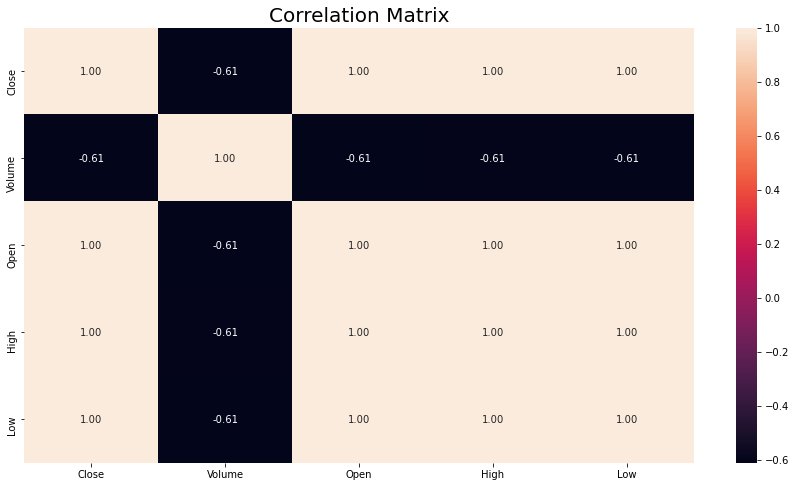

In [37]:
#Correlation matrix of the dataset
f, ax = plt.subplots(figsize= [15,8])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=20) 
plt.show()

## Testing & Training 

In [78]:
df_test = df.head(40)
df = df[40:]

In [79]:
training_df = df['Open']
training_df = pd.DataFrame(training_df)

In [80]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_df_scaled = sc.fit_transform(training_df)

In [81]:
# Create structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 2477):
    X_train.append(training_df_scaled[i-60:i, 0])
    y_train.append(training_df_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


# Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.99545328],
        [0.99365752],
        [1.        ],
        ...,
        [0.75512671],
        [0.75050358],
        [0.75222293]],

       [[0.99365752],
        [1.        ],
        [0.97592914],
        ...,
        [0.75050358],
        [0.75222293],
        [0.74981584]],

       [[1.        ],
        [0.97592914],
        [0.97543243],
        ...,
        [0.75222293],
        [0.74981584],
        [0.72226807]],

       ...,

       [[0.02927705],
        [0.02448045],
        [0.02419657],
        ...,
        [0.00685561],
        [0.00778368],
        [0.00501629]],

       [[0.02448045],
        [0.02419657],
        [0.01833971],
        ...,
        [0.00778368],
        [0.00501629],
        [0.00192682]],

       [[0.02419657],
        [0.01833971],
        [0.02266826],
        ...,
        [0.00501629],
        [0.00192682],
        [0.00174151]]])

In [82]:
#Importing Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [83]:
# Initialize RNN
regressor = Sequential()

In [84]:
# First LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


# Second LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Thirs LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Fourth LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units = 1))

In [85]:
# Compile RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fit RNN
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
76/76 [==============================] - 13s 105ms/step - loss: 0.0203
Epoch 2/10
76/76 [==============================] - 9s 115ms/step - loss: 0.0022
Epoch 3/10
76/76 [==============================] - 9s 117ms/step - loss: 0.0020
Epoch 4/10
76/76 [==============================] - 9s 113ms/step - loss: 0.0018
Epoch 5/10
76/76 [==============================] - 9s 117ms/step - loss: 0.0015
Epoch 6/10
76/76 [==============================] - 9s 122ms/step - loss: 0.0015
Epoch 7/10
76/76 [==============================] - 9s 116ms/step - loss: 0.0014
Epoch 8/10
76/76 [==============================] - 9s 123ms/step - loss: 0.0013
Epoch 9/10
76/76 [==============================] - 9s 125ms/step - loss: 0.0013
Epoch 10/10
76/76 [==============================] - 9s 120ms/step - loss: 0.0014


In [86]:
#Getting the real stock of 2017 i.e. importing the test dataset

test_data = pd.read_csv('HistoricalQuotes.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()

,Close/Last
0,$273.36
1,$273.52
2,$292.65
3,$288.08
4,$298.18


In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2020-02-28 to 2020-01-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   40 non-null     float64
 1   Volume  40 non-null     int64  
 2   Open    40 non-null     float64
 3   High    40 non-null     float64
 4   Low     40 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.9 KB


In [88]:
real_stock_price = df_test['Open'].values
real_stock_price

array([257.26 , 281.1  , 286.53 , 300.95 , 297.26 , 318.62 , 322.63 ,
       320.   , 315.36 , 324.74 , 324.19 , 321.47 , 323.6  , 314.18 ,
       322.37 , 322.57 , 323.52 , 315.31 , 304.3  , 320.93 , 320.544,
       324.45 , 312.6  , 310.06 , 320.25 , 317.92 , 318.58 , 317.19 ,
       316.27 , 313.59 , 311.85 , 316.7  , 311.64 , 310.6  , 307.235,
       297.16 , 299.84 , 293.79 , 297.15 , 296.24 ])

In [89]:
test_set = df_test['Open']
test_set = pd.DataFrame(test_set)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2020-02-28 to 2020-01-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [90]:
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price = predicted_stock_price.values
predicted_stock_price

array([[ 28.994535],
       [ 29.866793],
       [ 33.15727 ],
       [ 40.053036],
       [ 51.30142 ],
       [ 67.008385],
       [ 86.78696 ],
       [109.79388 ],
       [134.83305 ],
       [160.54106 ],
       [185.68648 ],
       [209.2652  ],
       [230.5473  ],
       [249.11179 ],
       [264.74576 ],
       [277.49197 ],
       [287.5472  ],
       [295.20212 ],
       [300.74316 ],
       [304.41055 ],
       [306.5419  ],
       [307.47388 ],
       [307.53784 ],
       [306.95956 ],
       [305.9053  ],
       [304.56525 ],
       [303.0929  ],
       [301.6124  ],
       [300.20825 ],
       [298.9304  ],
       [297.7914  ],
       [296.77945 ],
       [295.9035  ],
       [295.1444  ],
       [294.47488 ],
       [293.8531  ],
       [293.19168 ],
       [292.4368  ],
       [291.53342 ],
       [290.47562 ]], dtype=float32)

In [91]:
real_stock_price

array([257.26 , 281.1  , 286.53 , 300.95 , 297.26 , 318.62 , 322.63 ,
       320.   , 315.36 , 324.74 , 324.19 , 321.47 , 323.6  , 314.18 ,
       322.37 , 322.57 , 323.52 , 315.31 , 304.3  , 320.93 , 320.544,
       324.45 , 312.6  , 310.06 , 320.25 , 317.92 , 318.58 , 317.19 ,
       316.27 , 313.59 , 311.85 , 316.7  , 311.64 , 310.6  , 307.235,
       297.16 , 299.84 , 293.79 , 297.15 , 296.24 ])

In [95]:
import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print(rmse)

121.02468029102198


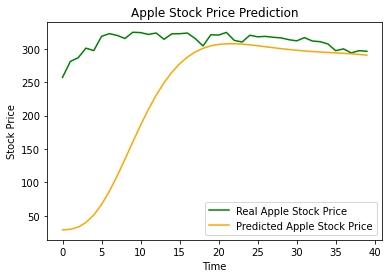

In [98]:
#Plot the results
plt.plot(real_stock_price, color = 'green', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'orange', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
